# Craft a Story from a Dataset

## Adult Income Dataset

**Source:** https://www.kaggle.com/wenruliu/adult-income-dataset

Analyzed by: Rayees Ahamed - Springboard Data Science Student (2021-2022)

### Introduction

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
income_df = pd.read_csv('adult.csv')
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Key questions:

* What influences an adult's income? 
    * Demographics 
    * Age 
    * Education 
    * Gender


* Can we predict adults income based on personal information?

## Exploring the data

In [3]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Missing values

In [4]:
income_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Age**

In [5]:
income_df['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

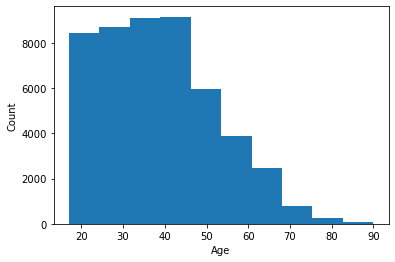

In [6]:
# Distribution of age
plt.hist(income_df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

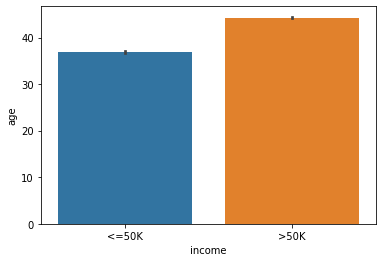

In [7]:
# Age vs income
sns.barplot(x='income', y='age', data=income_df)
plt.show()

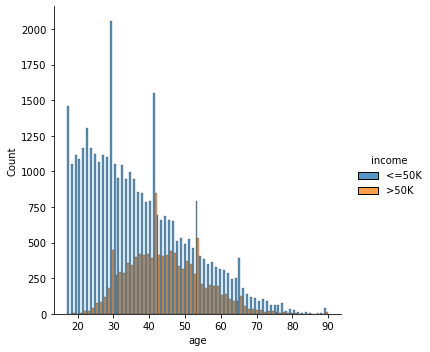

In [8]:
sns.displot(x="age", hue="income", data=income_df, multiple="dodge")
plt.show()

**Working class**

In [9]:
income_df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [10]:
income_df['workclass'] = income_df['workclass'].str.replace('?', 'Other')
income_df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

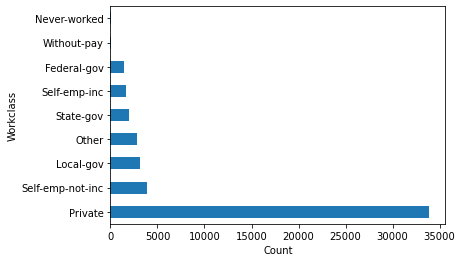

In [11]:
income_df.workclass.value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

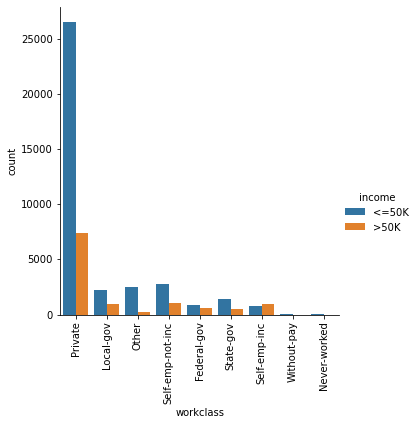

In [12]:
sns.catplot(x='workclass', data=income_df, kind='count', hue='income')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Education
income_df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

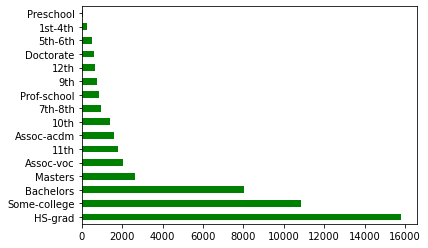

In [14]:
income_df['education'].value_counts().plot(kind='barh', color='green')
plt.show()

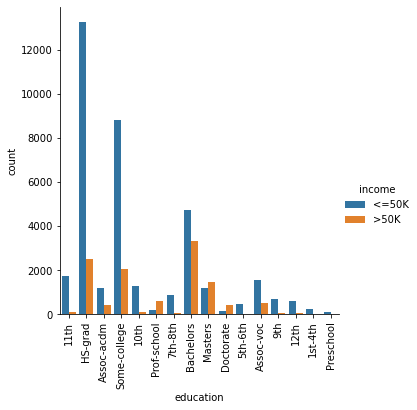

In [15]:
sns.catplot(x='education', data=income_df, kind='count', hue='income')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Marital status
income_df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

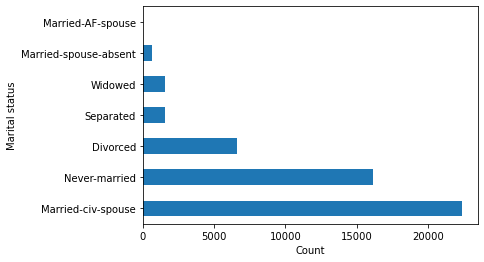

In [17]:
income_df['marital-status'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Marital status')
plt.show()

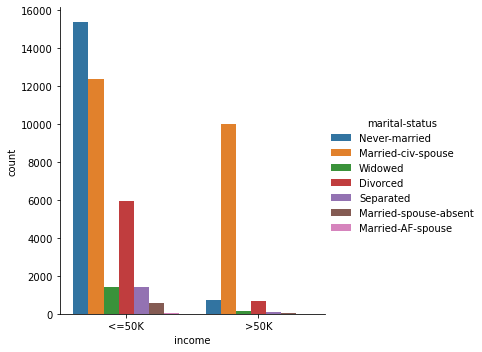

In [18]:
# Marital status vs income
sns.catplot(x='income', data=income_df, kind='count', hue='marital-status')
plt.show()

In [19]:
income_df.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

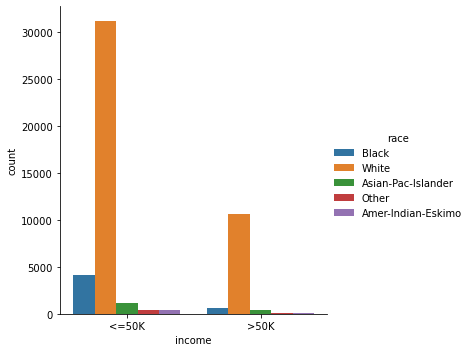

In [20]:
# race vs income
sns.catplot(x='income', data=income_df, kind='count', hue='race')
plt.show()

In [21]:
# Gender
income_df.gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

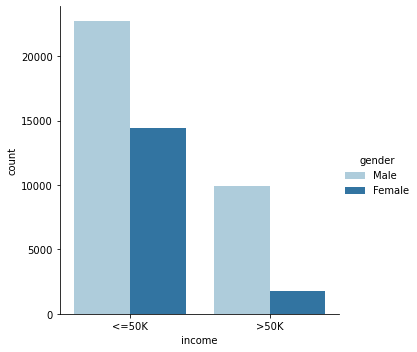

In [22]:
sns.catplot(x='income', data=income_df, kind='count', hue='gender', palette='Paired')
plt.show()

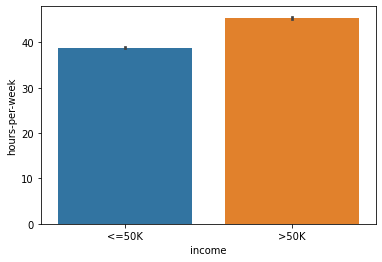

In [23]:
# hours-per-week
sns.barplot(y="hours-per-week", x="income", data=income_df)
plt.show()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,37155.0,38.840048,12.356849,1.0,35.0,40.0,40.0,99.0
>50K,11687.0,45.452896,11.091176,1.0,40.0,40.0,50.0,99.0


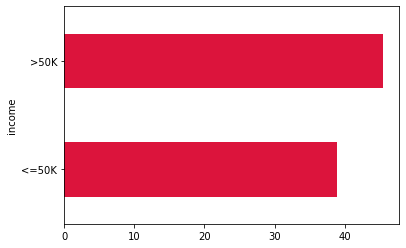

In [24]:
avg_hours = income_df.groupby('income')['hours-per-week'].describe()
avg_hours['mean'].plot(kind='barh', ylabel='Avg. No. of tests per patient', color='crimson')
avg_hours

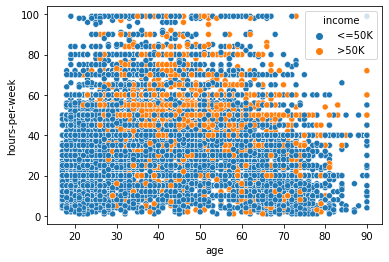

In [25]:
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=income_df)
plt.show()

In [27]:
# native-country
income_df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [28]:
income_df['native-country'] = income_df['native-country'].str.replace('?', 'Other')
income_df['native-country'].value_counts() / len(income_df['native-country']) * 100

United-States                 89.742435
Mexico                         1.947095
Other                          1.754637
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                           0.120798
